In [1]:
from sklearn.cluster import KMeans
import numpy as np
import plotly.express as px
import pandas as pd
from tqdm import tqdm
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd 'drive/MyDrive/GitHub/master-thesis'

/content/drive/MyDrive/GitHub/master-thesis


In [4]:
from clustering.utils import *

In [ ]:
#%cd ..

/home/anuar/PycharmProjects/master-thesis


# Import Data

In [39]:
df, answers, info_dict = get_cluster_input_data(pca_data=True)
df.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,Q16_Red-Green_Alliance,Q16_Other,Q16_Unsure_of_party_choice,Q16_Venstre,Vaccination_Status,Willingness_Vaccination,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers
0,-0.434335,-0.223732,-0.240509,-0.258341,0.351749,0.006769,0.107871,-0.273086,-0.062490,0.222961,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1,-0.736331,-0.132329,-0.179533,-0.314854,0.071059,-0.346478,-0.465221,0.246890,0.043862,0.076761,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,2.0,2.0
2,-0.754406,0.152623,0.148076,0.532508,-0.337626,-0.078483,-0.223338,0.072501,0.408530,0.042416,...,0.0,0.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,0.0
3,-0.610206,0.016363,0.464969,-0.090197,0.537031,0.478387,0.392734,-0.434215,-0.445998,0.096336,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
4,0.102406,-0.666096,0.552092,0.699626,0.410284,0.096322,-0.561797,0.326299,0.070234,-0.236242,...,0.0,1.0,0.0,0.0,NaN,NaN,4.0,1.0,4.0,15.0


In [37]:
info_dict

{'cluster_input_cols': ['PC_0',
  'PC_1',
  'PC_2',
  'PC_3',
  'PC_4',
  'PC_5',
  'PC_6',
  'PC_7',
  'PC_8',
  'PC_9'],
 'combined_data': False,
 'data_path': 'data/preprocessing/dim_reduction/220407_pca_data.csv',
 'grouped_data': False,
 'pca_data': True,
 'scaler_type': 'None'}

# K-means clustering

## Elbow approach to determine ideal amount of clusters

In [41]:
distortions = []
distortions_k = []
K = range(1,9)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(answers)
    distortions.append(kmeanModel.inertia_)
    distortions_k.append(kmeanModel.inertia_/k)


100%|██████████| 8/8 [00:25<00:00,  3.17s/it]


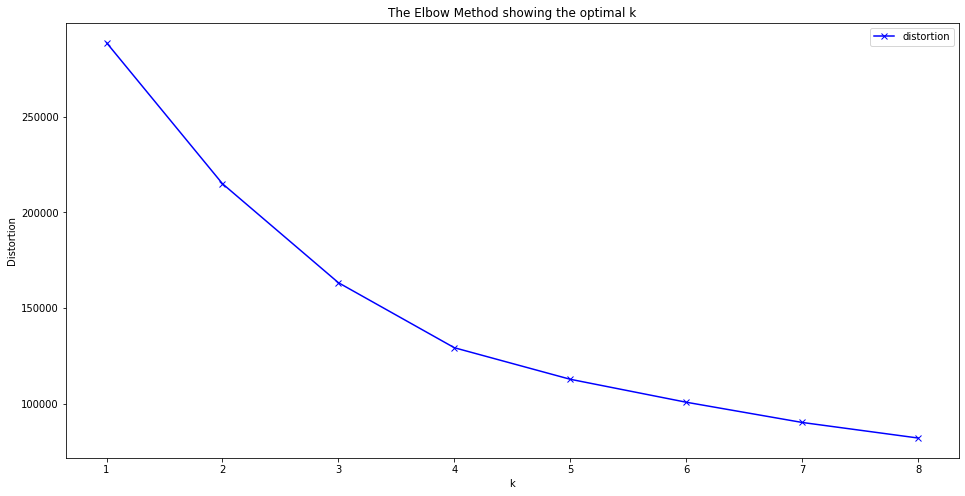

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', label='distortion')
#plt.plot(K, distortions_k, 'rx-', label='distortion/K')
plt.legend()
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## K-means fit

In [46]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(answers)

In [47]:
df['group']=kmeans.labels_

In [48]:
df.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,Q16_Other,Q16_Unsure_of_party_choice,Q16_Venstre,Vaccination_Status,Willingness_Vaccination,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers,group
0,-0.434335,-0.223732,-0.240509,-0.258341,0.351749,0.006769,0.107871,-0.273086,-0.062490,0.222961,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2
1,-0.736331,-0.132329,-0.179533,-0.314854,0.071059,-0.346478,-0.465221,0.246890,0.043862,0.076761,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,2.0,2.0,2
2,-0.754406,0.152623,0.148076,0.532508,-0.337626,-0.078483,-0.223338,0.072501,0.408530,0.042416,...,0.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,0.0,3
3,-0.610206,0.016363,0.464969,-0.090197,0.537031,0.478387,0.392734,-0.434215,-0.445998,0.096336,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,3
4,0.102406,-0.666096,0.552092,0.699626,0.410284,0.096322,-0.561797,0.326299,0.070234,-0.236242,...,1.0,0.0,0.0,NaN,NaN,4.0,1.0,4.0,15.0,1


# Saving Data

In [49]:
df.to_csv("data/clustering/220415_k_means_pca_data.csv",index=False)